# Electric Vechicle Data Analysis

The data is downloaded from kaggle (https://www.kaggle.com/datasets/adarshde/electric-vehicle-population-dataset)

### Importing essential python packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore') 

Get the filepath of the CSV file which contains the data

In [2]:
file_path = ''

for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if '.csv' in filename:
            print(os.path.join(dirname, filename))
            file_path = filename

c:\Users\HP\Documents\Projects\EV Analysis\Electric_Vehicle_Population_Data.csv


### Reading the data using Pandas dataframe

In [3]:
data = pd.read_csv(file_path)
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


Getting the information on the data in the dataframe

There are some null values in the following columns (`Country`, `City`, `Postal Code`, `Legislative District`, `Vechile Location`, `Electric Utility`, `2020 Census Tract`) for some rows 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

Getting the statistical data on numeric columns

In [5]:
# Dropping the Postal Code and DOL Vehicle ID column
column_list_not_include = data.columns.isin(["Postal Code", "DOL Vehicle ID"])
filtered_columns = data.loc[:, ~column_list_not_include]

filtered_columns.describe()

,Model Year,Electric Range,Base MSRP,Legislative District,2020 Census Tract
count,191407.000000,191407.000000,191407.000000,190993.000000,1.914030e+05
mean,2020.732335,55.657442,994.773258,29.016880,5.297759e+10
std,2.990487,90.151930,8050.523372,14.909417,1.573588e+09
min,1997.000000,0.000000,0.000000,1.000000,1.001020e+09
25%,2019.000000,0.000000,0.000000,17.000000,5.303301e+10
50%,2022.000000,0.000000,0.000000,33.000000,5.303303e+10
75%,2023.000000,72.000000,0.000000,42.000000,5.305307e+10
max,2025.000000,337.000000,845000.000000,49.000000,5.602100e+10


### Visualizing the missing data

Bar chart gives an idea about how many missing values are there in each column.
Lower the value of bar chart more is the number of null values. 

On the left side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.

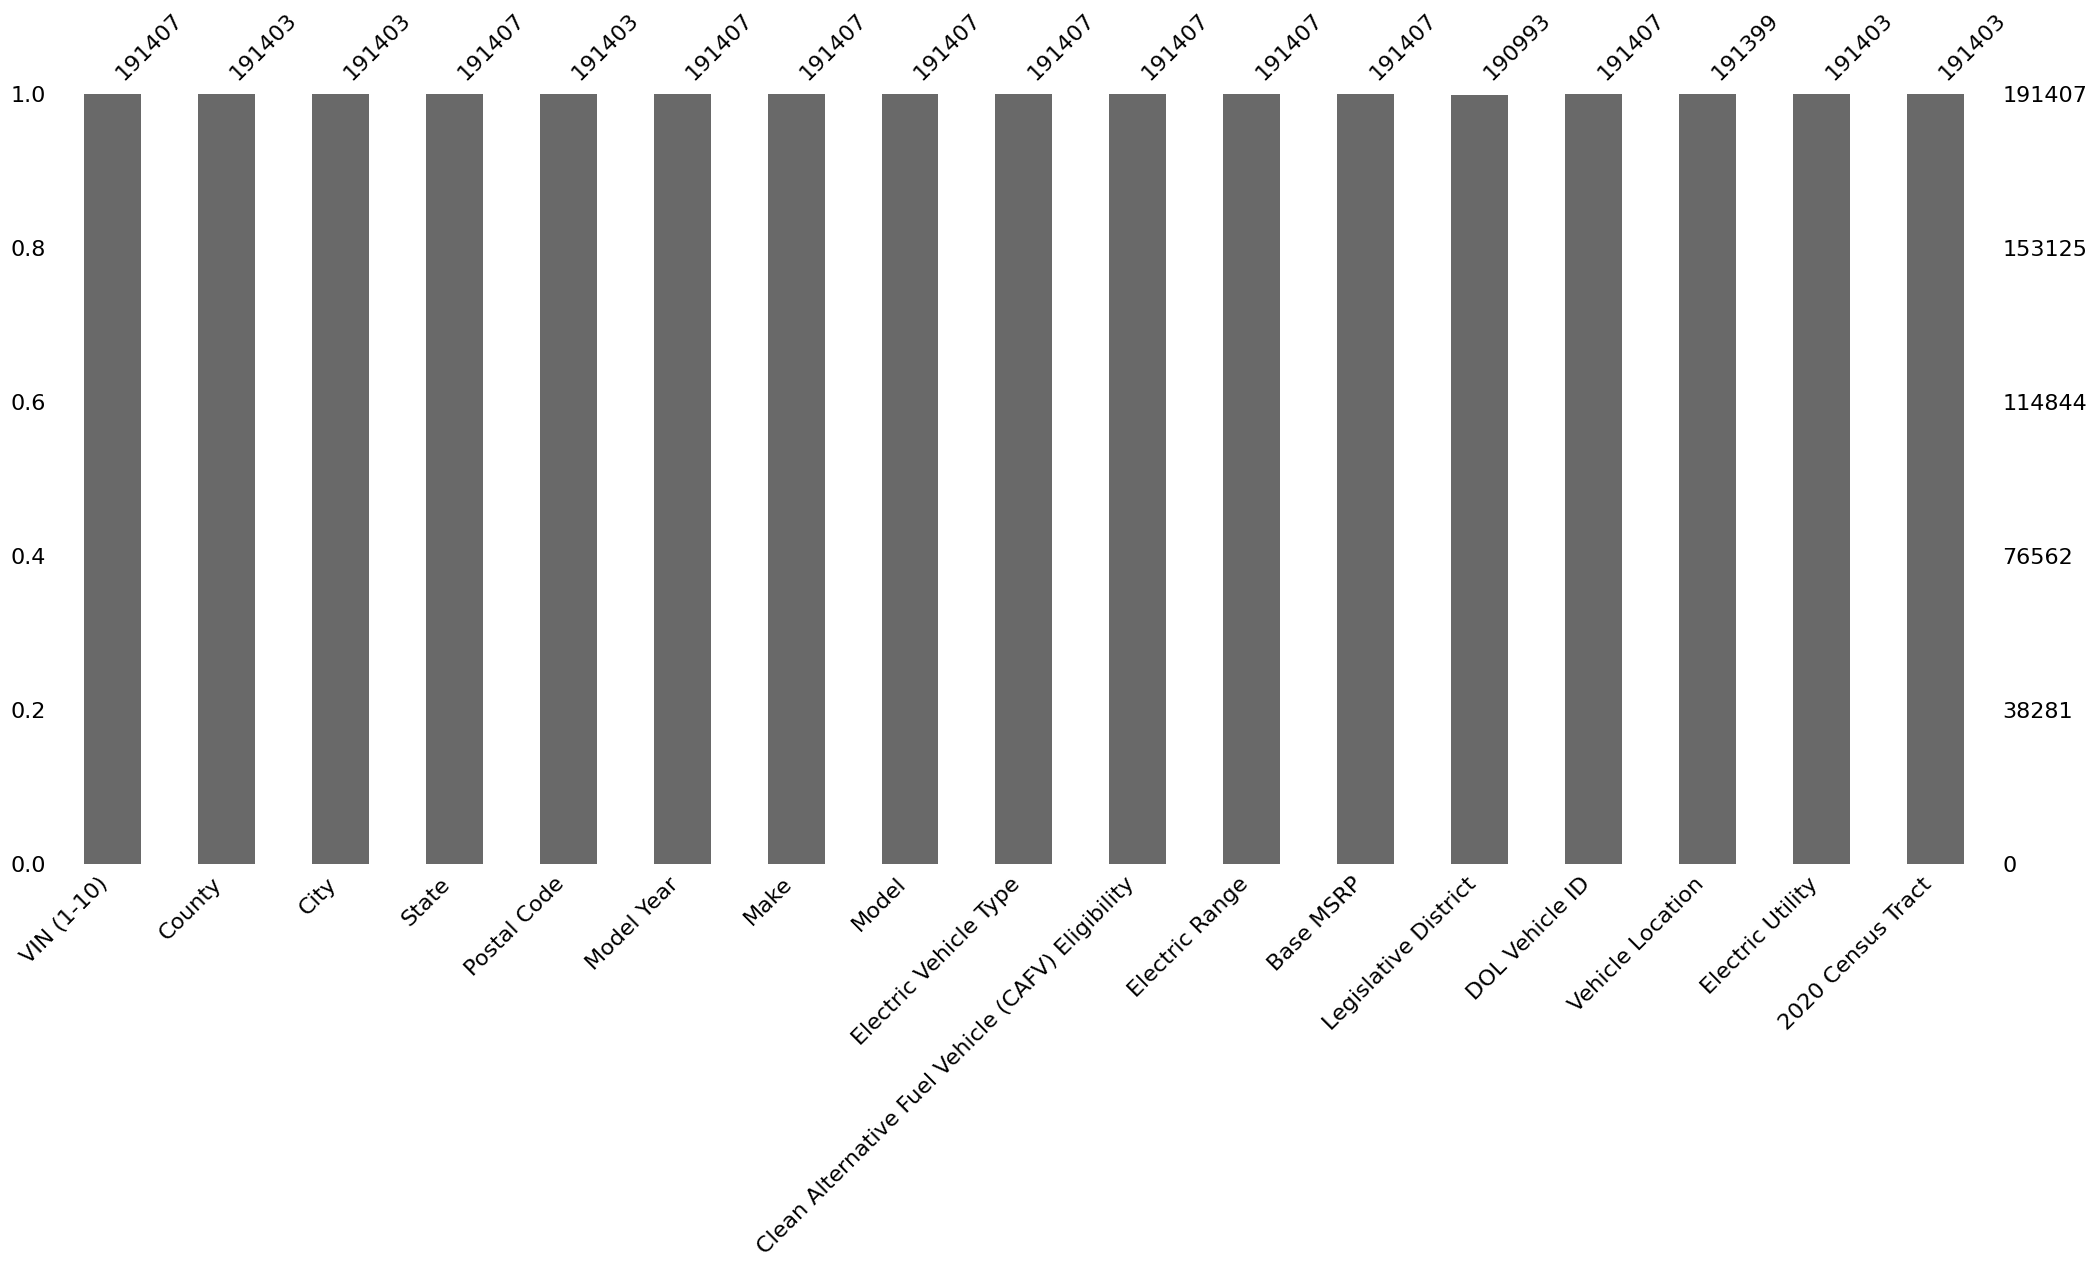

In [6]:
import missingno as msno

msno.bar(data)
plt.show()

Use matrix to deterrmine the pattern of missingness data in various columns of the dataframe

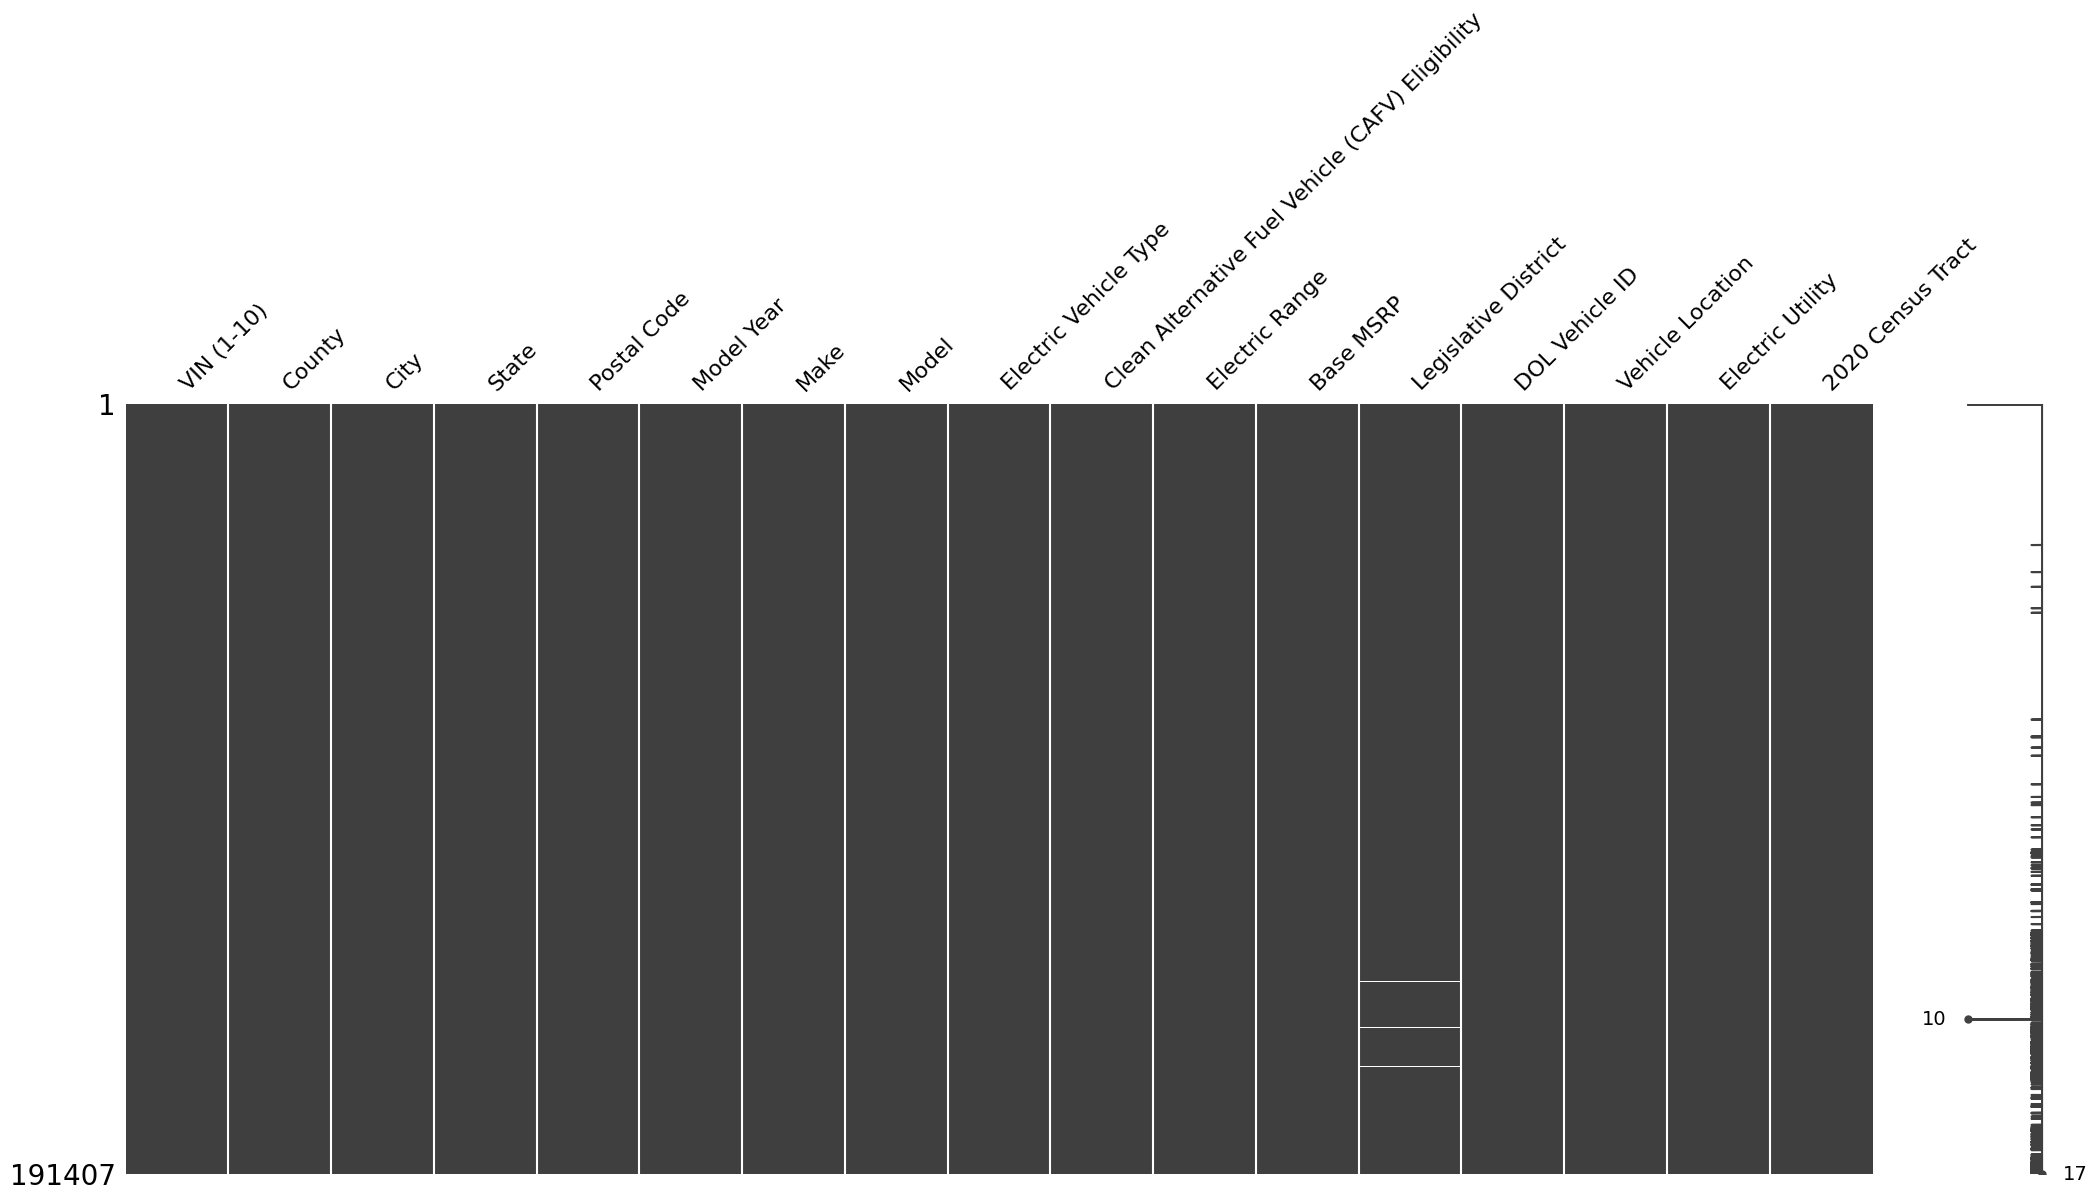

In [7]:
msno.matrix(data)
plt.show()

The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

<Axes: >

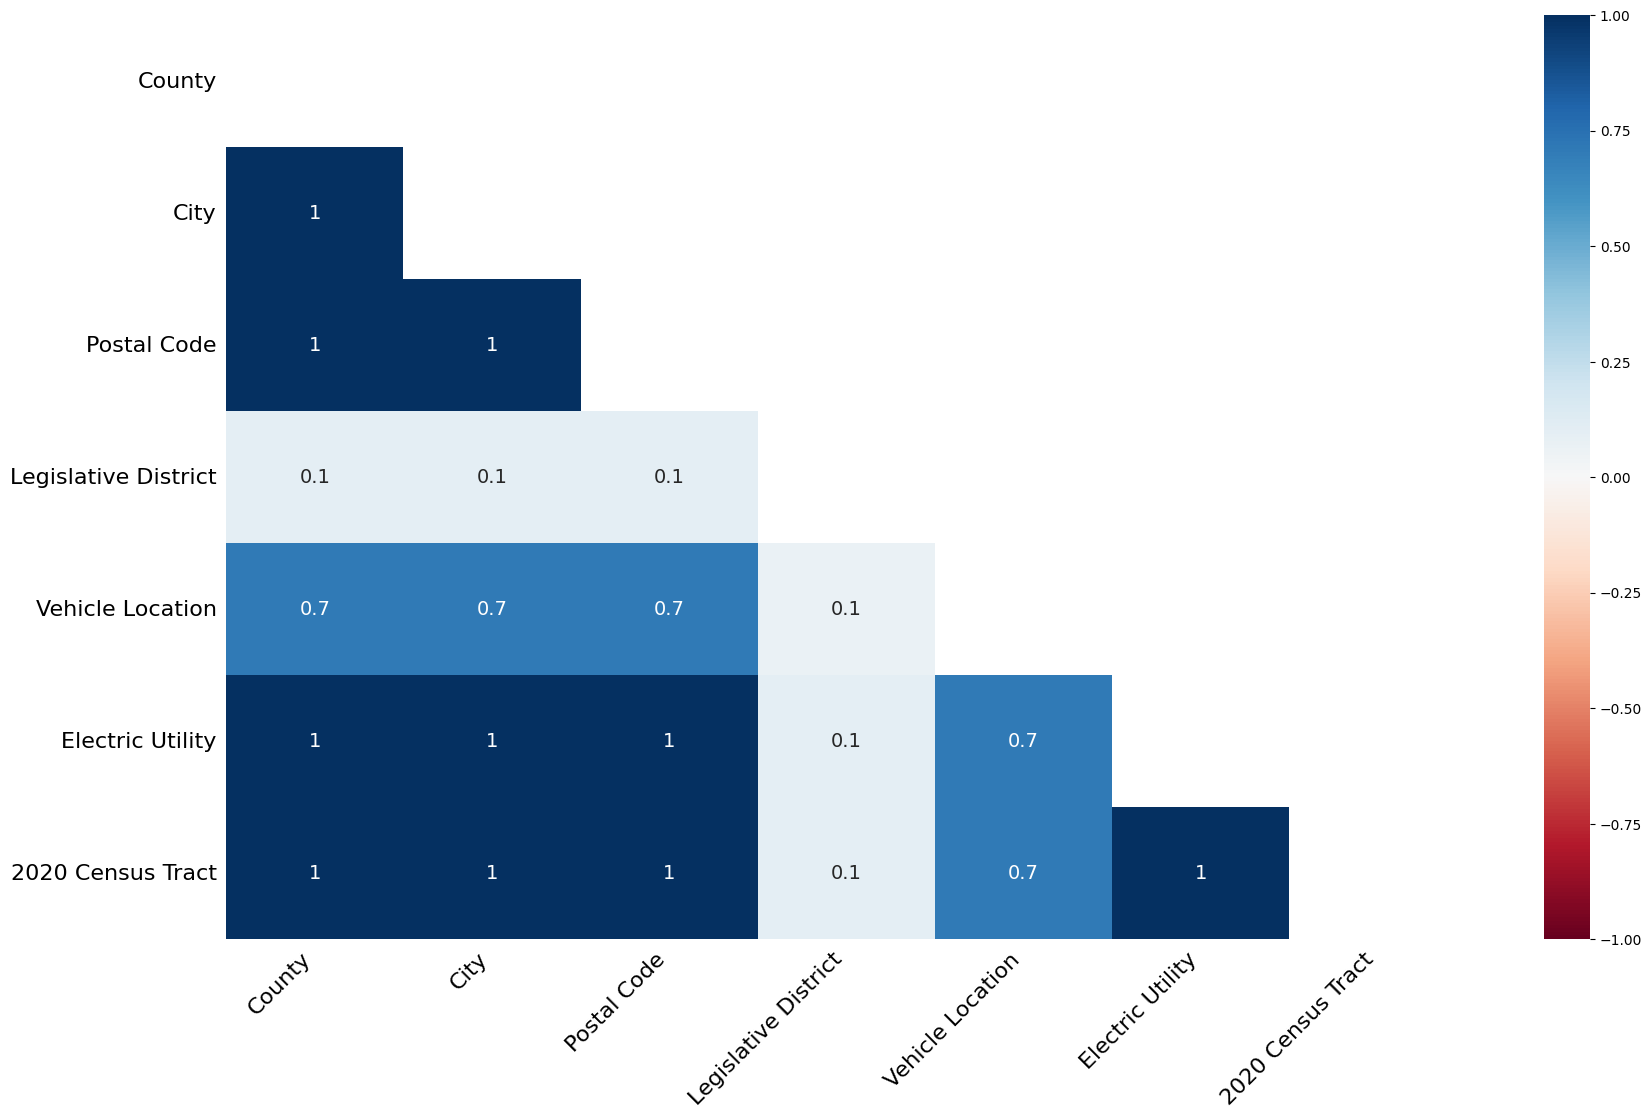

In [8]:
msno.heatmap(data)

Count of Null Values

In [9]:
data.isna().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [10]:
# Range of electric vehicles

data['Electric Range'].sort_values().unique()

array([  0,   6,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  46,  47,
        48,  51,  53,  56,  57,  58,  59,  62,  68,  72,  73,  74,  75,
        76,  81,  82,  83,  84,  87,  93,  95,  97, 100, 103, 107, 110,
       111, 114, 124, 125, 126, 149, 150, 151, 153, 170, 192, 200, 203,
       204, 208, 210, 215, 218, 220, 222, 233, 234, 238, 239, 245, 249,
       258, 259, 265, 266, 270, 289, 291, 293, 308, 322, 330, 337],
      dtype=int64)

In [11]:
# Removing the rows where range is 0
data = data[data['Electric Range'] > 0]

data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89274 entries, 0 to 191402
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         89274 non-null  object 
 1   County                                             89270 non-null  object 
 2   City                                               89270 non-null  object 
 3   State                                              89274 non-null  object 
 4   Postal Code                                        89270 non-null  float64
 5   Model Year                                         89274 non-null  int64  
 6   Make                                               89274 non-null  object 
 7   Model                                              89274 non-null  object 
 8   Electric Vehicle Type                              89274 non-null  object 
 9   Clean Alte

In [13]:
data = data.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV Eligibility'})

In [14]:
data['CAFV Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range'], dtype=object)

In [15]:
data['CAFV Eligibility'] = data['CAFV Eligibility'].apply(lambda x: 'Eligible' if x == 'Clean Alternative Fuel Vehicle Eligible' else 'Not Eligible')

In [16]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not Eligible,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


### Histogram Chart of the electric vehicle range distribution

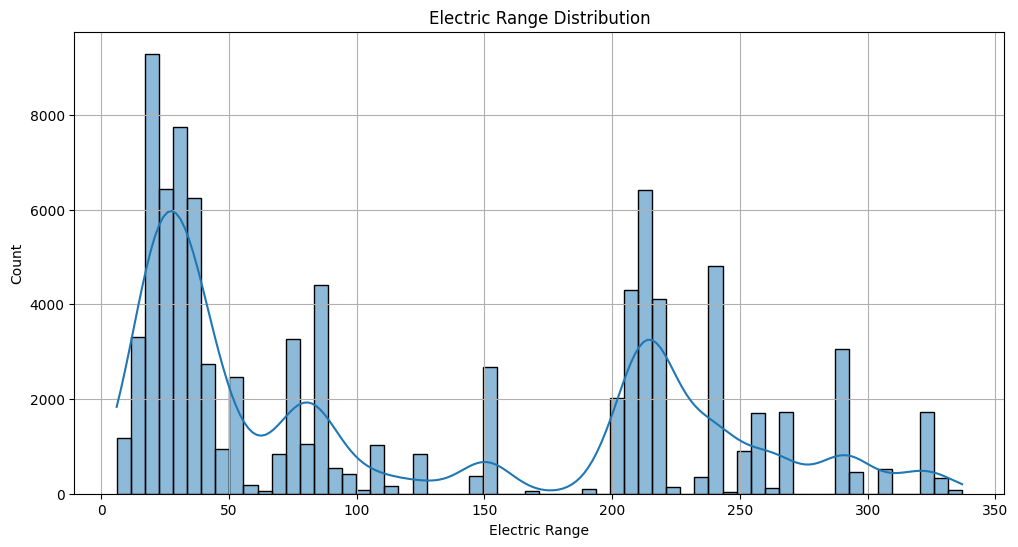

In [17]:

plt.figure(figsize=(12, 6))
plt.title('Electric Range Distribution')
sns.histplot(data['Electric Range'], bins=60, kde=True)
plt.grid()
plt.show()

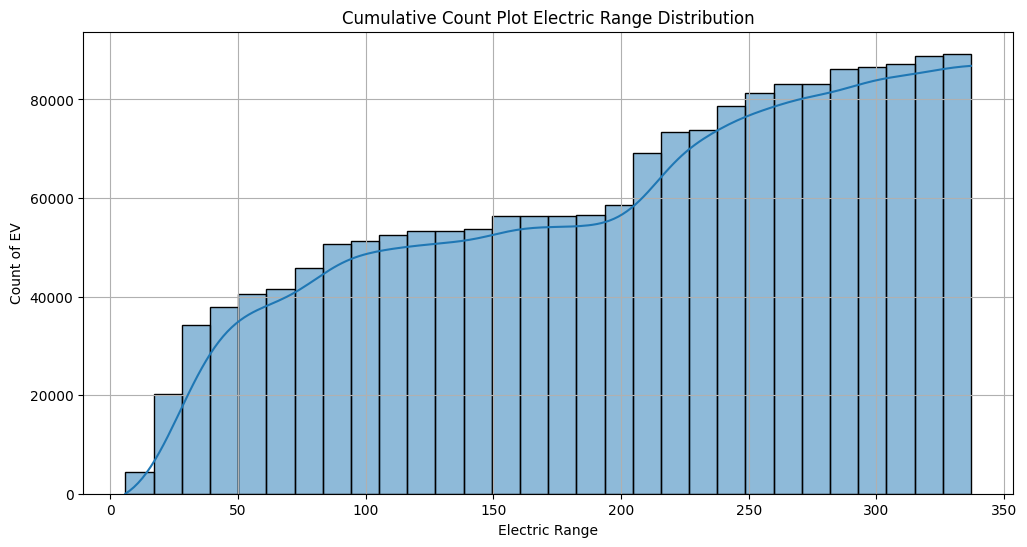

In [18]:
plt.figure(figsize=(12, 6))
plt.title('Cumulative Count Plot Electric Range Distribution')
sns.histplot(data['Electric Range'], bins=30, cumulative=True, kde=True)
plt.ylabel('Count of EV')
plt.grid()
plt.show()

In [19]:
# Simplifying the names in Electric Vehicle Type. Using only short form

data['Electric Vehicle Type'] = data['Electric Vehicle Type'].apply(lambda name: 'BEV' if 'Battery Electric Vehicle' in name else 'PHEV')

data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,BEV,Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,PHEV,Not Eligible,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,BEV,Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,BEV,Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,PHEV,Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


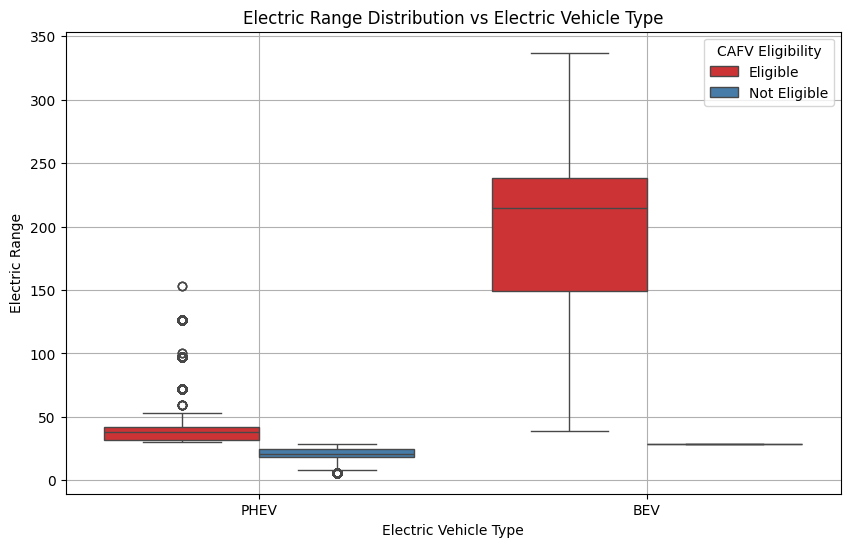

In [20]:
# Box Plot on types of Electric Vehicle vs Electric range

plt.figure(figsize=(10, 6))
plt.title('Electric Range Distribution vs Electric Vehicle Type')
sns.boxplot(data=data, x='Electric Vehicle Type', y='Electric Range', hue='CAFV Eligibility', order=['PHEV', 'BEV'], palette='Set1')
plt.grid()
plt.show()

In [21]:
grouped_data = data.groupby('Electric Utility')['Electric Range'].agg({'count','mean', 'sum', 'median'})
grouped_data.reset_index(inplace=True)
grouped_data.sort_values(by='mean', ascending=False, inplace=True)
grouped_data.head(10)

,Electric Utility,mean,median,sum,count
55,CITY OF TACOMA - (WA),189.200000,229.0,1892,10
35,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,148.100000,179.5,1481,10
38,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF K...,137.142857,81.0,960,7
63,PUD NO 1 OF CHELAN COUNTY,130.323580,84.0,75718,581
5,BONNEVILLE POWER ADMINISTRATION||BIG BEND ELEC...,129.105263,35.0,2453,19
60,"OKANOGAN COUNTY ELEC COOP, INC",129.088608,53.0,10198,79
42,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF W...,128.930233,53.0,5544,43
49,CITY OF BLAINE - (WA)||PUD NO 1 OF WHATCOM COUNTY,128.030000,84.0,12803,100
70,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),125.738922,84.0,3776820,30037
40,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF M...,123.700000,46.0,1237,10


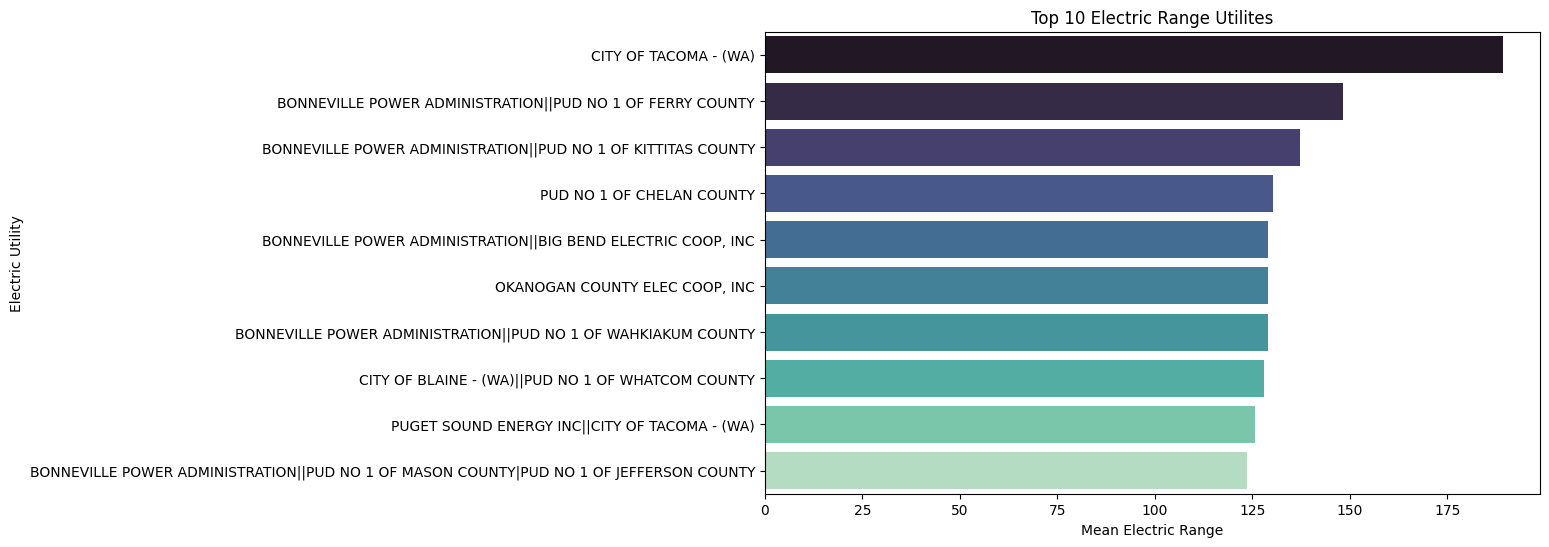

In [22]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Electric Range Utilites')
sns.barplot(data = grouped_data.head(10), x='mean', y='Electric Utility', palette='mako')
plt.xlabel('Mean Electric Range')
plt.show()

In [23]:
# Function to show the median in the plot

def show_median(plot):
    ax = plot.axes
    lines = ax.get_lines()
    categories = ax.get_xticks()
    
    for cat in categories:
        y = round(lines[4+cat*6].get_ydata()[0],1) 
        ax.text(
            cat,
            y,
            y,
            ha='center',
            va='center',
            fontweight='bold',
            size=6,
            color='white',
            bbox={
                'facecolor':'#445A64'
            }
        )

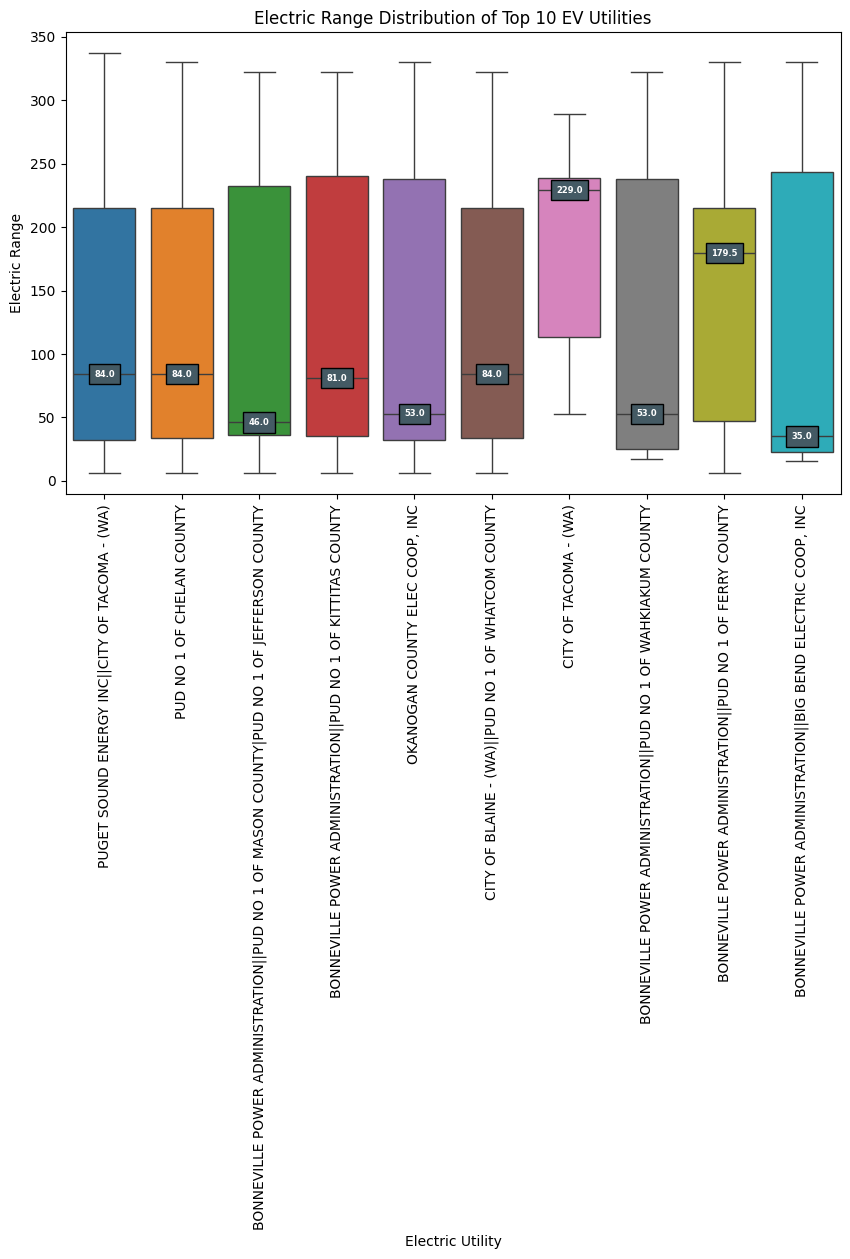

In [24]:
data_ev_utlility_top_10 = data[data['Electric Utility'].isin(grouped_data.head(10)['Electric Utility'])]

plt.figure(figsize=(10, 6))
plt.title('Electric Range Distribution of Top 10 EV Utilities')
bx = sns.boxplot(data=data_ev_utlility_top_10, x='Electric Utility', y='Electric Range', palette='tab10')
show_median(bx)
plt.xticks(rotation=90)   
plt.show()

In [25]:
make_data =  data.groupby('Make')['Electric Range'].agg(['count','mean'])
make_data.reset_index(inplace=True)
make_data.sort_values('mean', ascending=False, inplace=True)
make_data.head(10)

,Make,count,mean
29,TESLA,25691,241.019384
14,JAGUAR,204,234.000000
25,POLESTAR,152,233.000000
6,CHEVROLET,9582,140.698497
32,VOLKSWAGEN,1071,107.549020
24,NISSAN,10721,104.606753
34,WHEEGO ELECTRIC CARS,3,100.000000
30,TH!NK,5,100.000000
13,HYUNDAI,993,92.041289
9,FIAT,781,85.628681


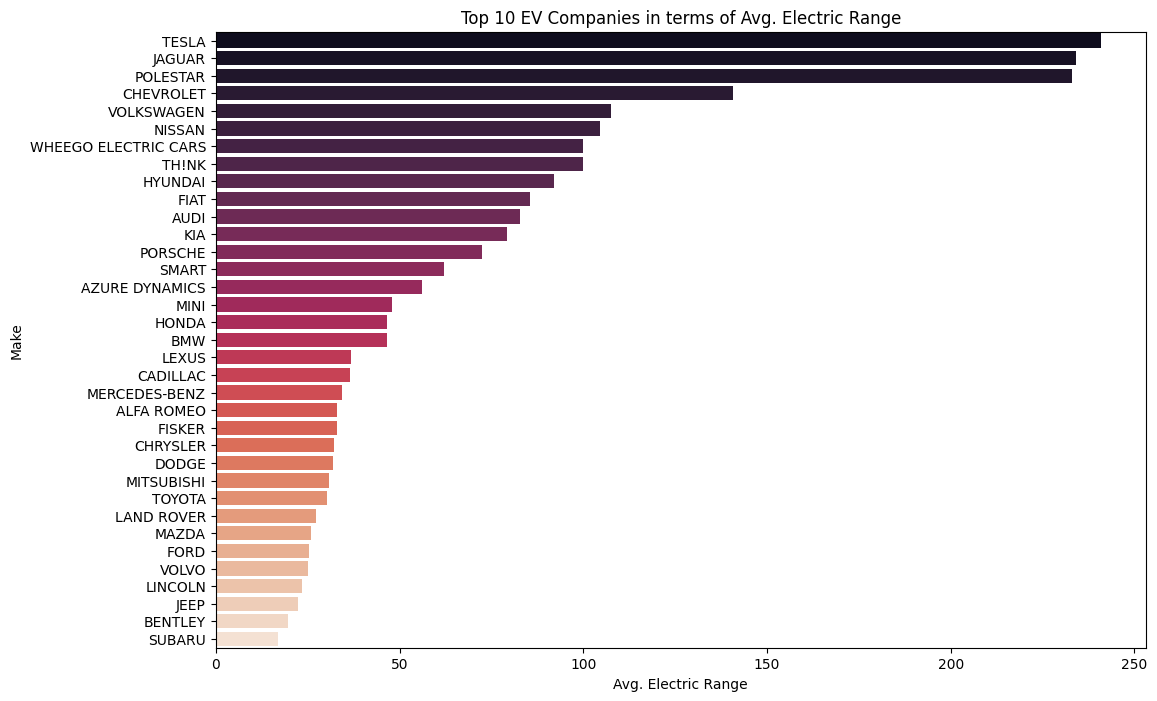

In [26]:
plt.figure(figsize=(12, 8))
plt.title('Top 10 EV Companies in terms of Avg. Electric Range')
sns.barplot(data=make_data, x='mean', y='Make', palette='rocket')
plt.xlabel('Avg. Electric Range')
plt.show()

In [27]:
top_10_ev_companies = make_data.head(10)['Make']
print(list(top_10_ev_companies))

['TESLA', 'JAGUAR', 'POLESTAR', 'CHEVROLET', 'VOLKSWAGEN', 'NISSAN', 'WHEEGO ELECTRIC CARS', 'TH!NK', 'HYUNDAI', 'FIAT']


In [28]:
filtered_data = data[data['Make'].isin(list(top_10_ev_companies))]
filtered_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,BEV,Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,BEV,Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,BEV,Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
5,5YJ3E1EB6K,King,Redmond,WA,98052.0,2019,TESLA,MODEL 3,BEV,Eligible,220,0,48.0,296777442,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
6,5YJ3E1EB0J,Thurston,Yelm,WA,98597.0,2018,TESLA,MODEL 3,BEV,Eligible,215,0,2.0,311913577,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


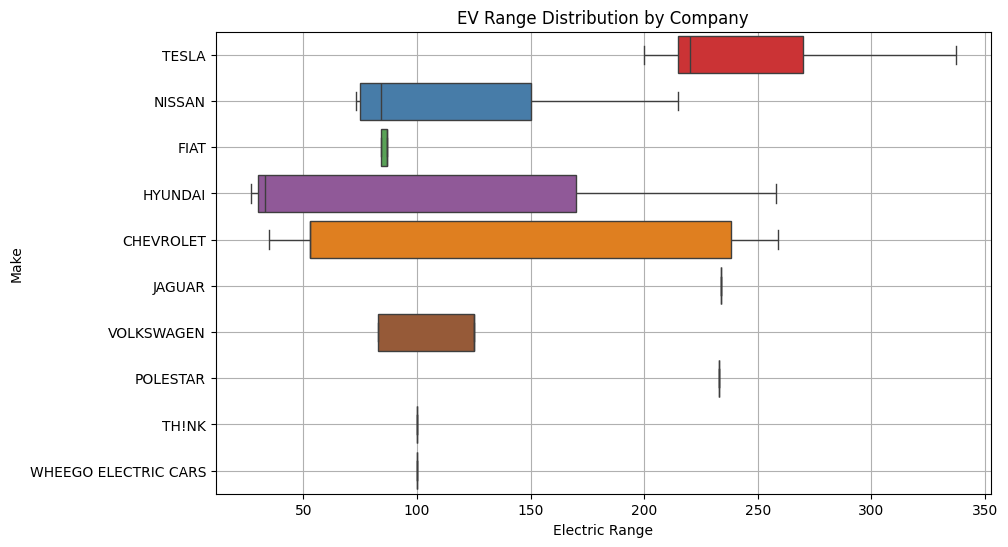

In [29]:
plt.figure(figsize=(10, 6))
plt.title('EV Range Distribution by Company')
sns.boxplot(data = filtered_data, y='Make', x='Electric Range', palette='Set1')
plt.grid()
plt.show()

In [30]:
filtered_data = data.groupby(['Make','Model'])['Electric Range'].agg(['count']).reset_index().sort_values('count', ascending=False)

filtered_data['Make'].unique()

array(['TESLA', 'NISSAN', 'CHEVROLET', 'JEEP', 'CHRYSLER', 'TOYOTA',
       'BMW', 'KIA', 'FORD', 'VOLVO', 'VOLKSWAGEN', 'MITSUBISHI', 'HONDA',
       'FIAT', 'AUDI', 'DODGE', 'MAZDA', 'PORSCHE', 'HYUNDAI', 'LEXUS',
       'MINI', 'MERCEDES-BENZ', 'JAGUAR', 'LINCOLN', 'POLESTAR', 'SMART',
       'CADILLAC', 'SUBARU', 'ALFA ROMEO', 'LAND ROVER', 'FISKER',
       'AZURE DYNAMICS', 'TH!NK', 'WHEEGO ELECTRIC CARS', 'BENTLEY'],
      dtype=object)

In [31]:
filtered_data

,Make,Model,count
80,TESLA,MODEL 3,13862
70,NISSAN,LEAF,10721
81,TESLA,MODEL S,6021
27,CHEVROLET,VOLT,4801
24,CHEVROLET,BOLT EV,4533
...,...,...,...
15,BMW,745LE,2
9,BENTLEY,BENTAYGA,1
25,CHEVROLET,S-10 PICKUP,1
72,PORSCHE,918,1


In [60]:
from collections import Counter
top_5_ev_comp = Counter(list(filtered_data['Make']))
top_5_ev_comp = dict(filter(lambda item: item[1] > 2, top_5_ev_comp.items()))
top_5_ev_comp


{'TESLA': 5,
 'CHEVROLET': 4,
 'TOYOTA': 4,
 'BMW': 11,
 'KIA': 6,
 'FORD': 5,
 'VOLVO': 5,
 'AUDI': 7,
 'PORSCHE': 4,
 'HYUNDAI': 5,
 'LEXUS': 3,
 'MERCEDES-BENZ': 5,
 'SMART': 3}

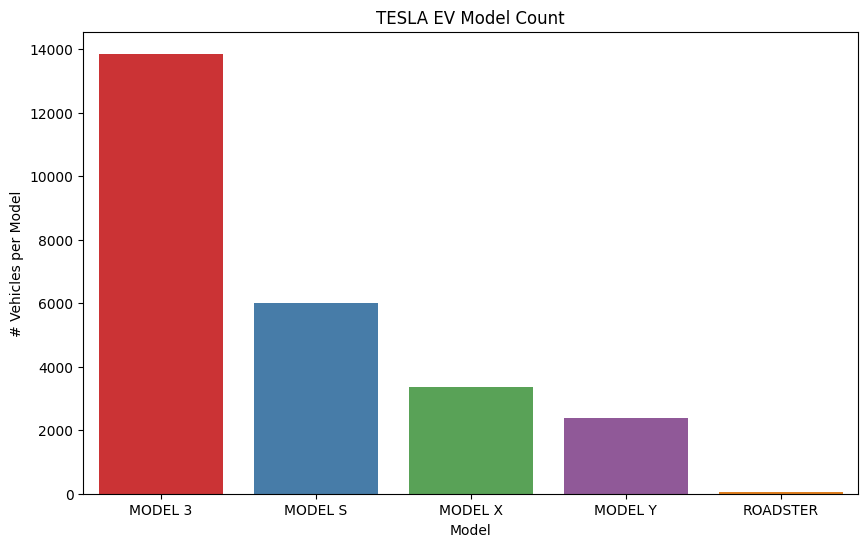

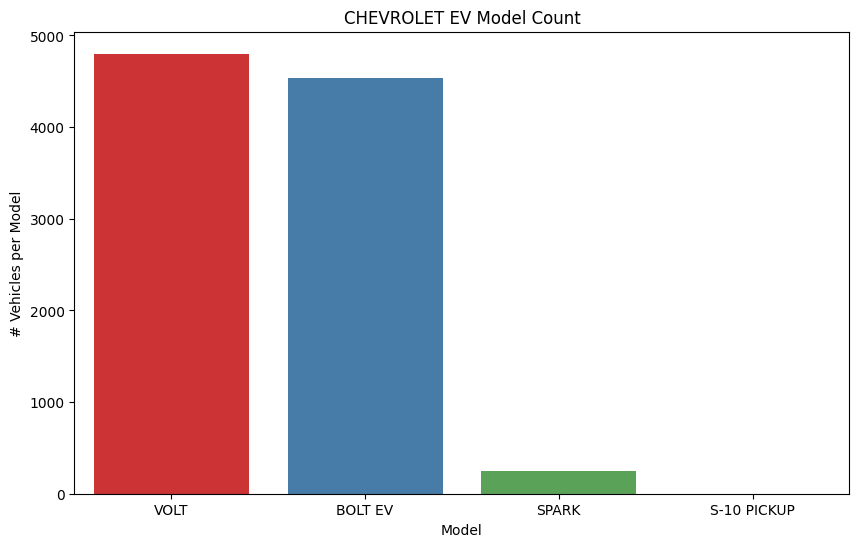

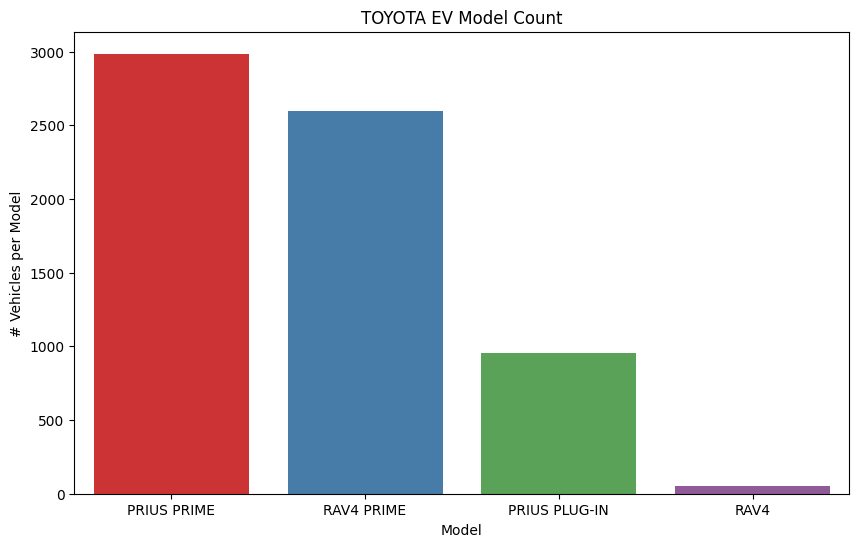

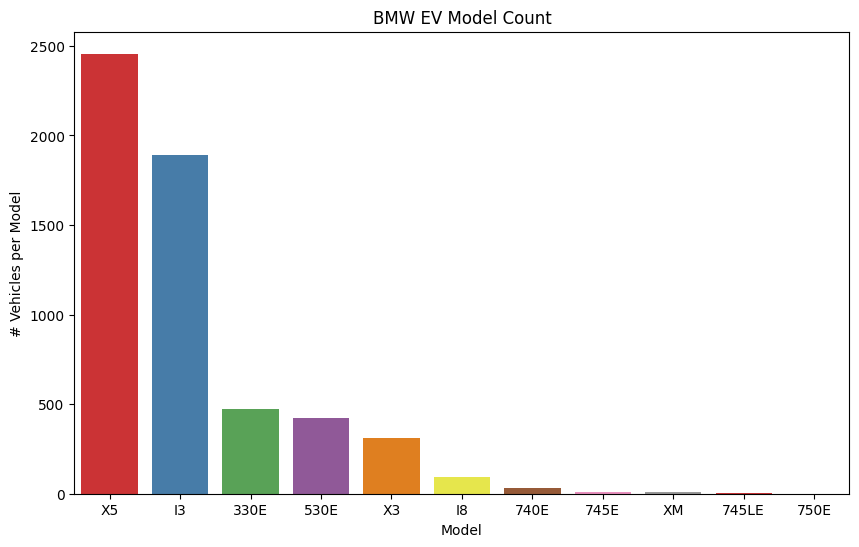

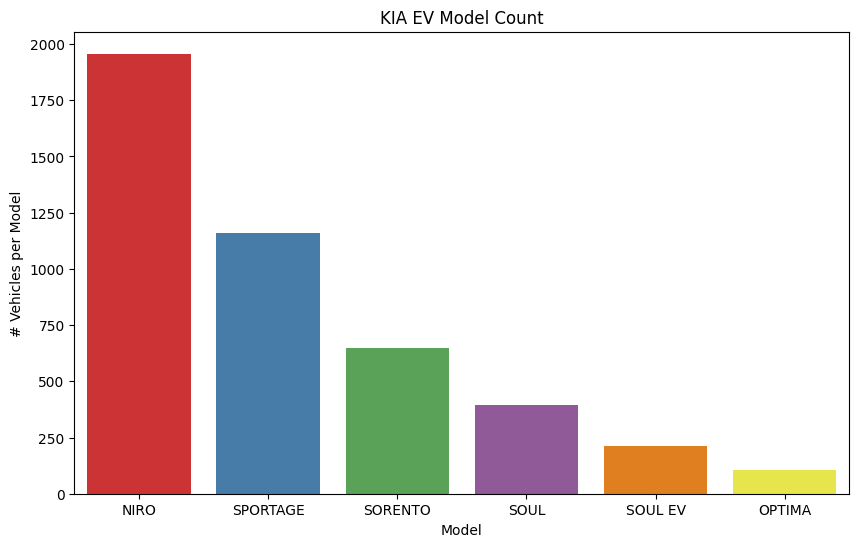

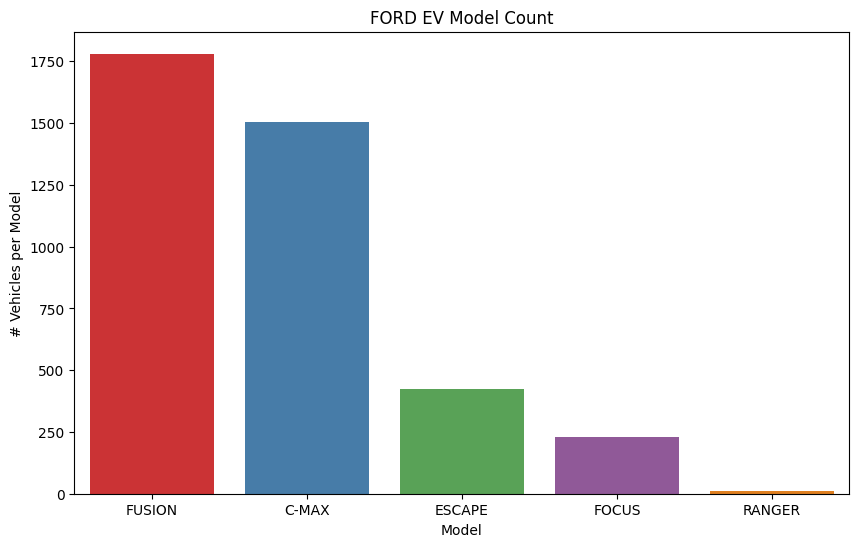

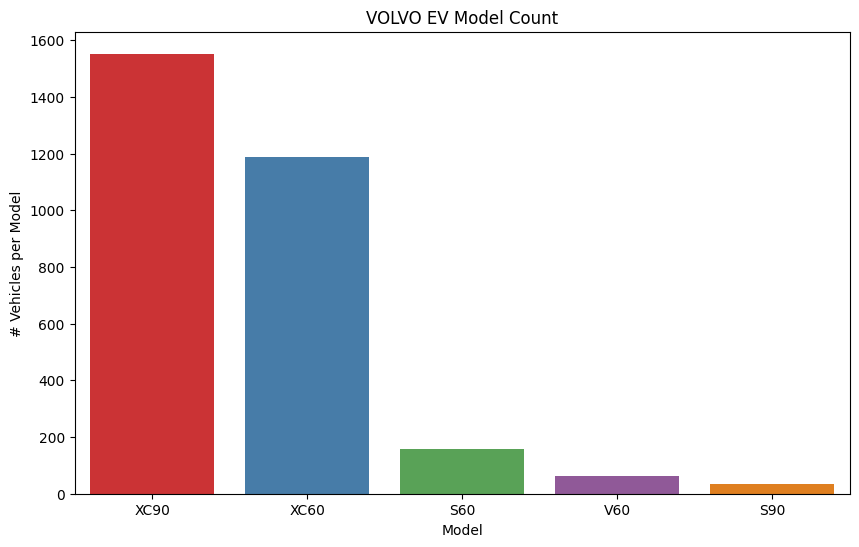

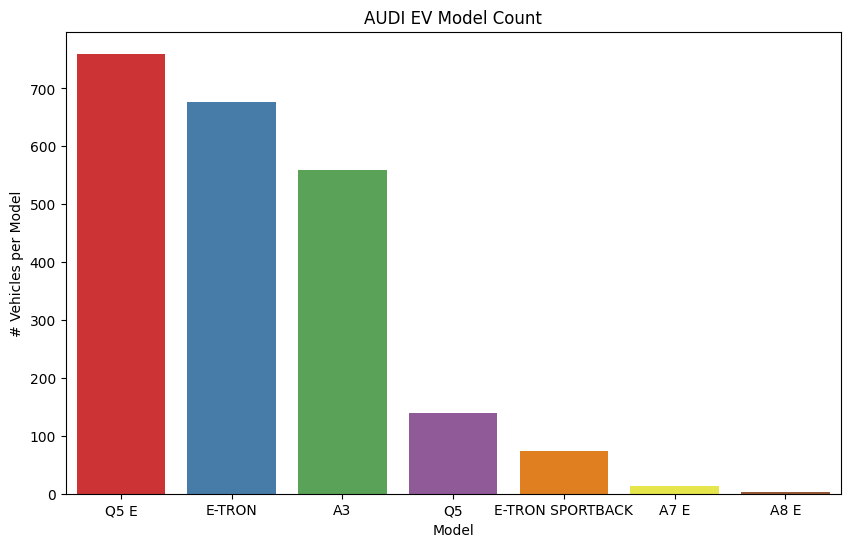

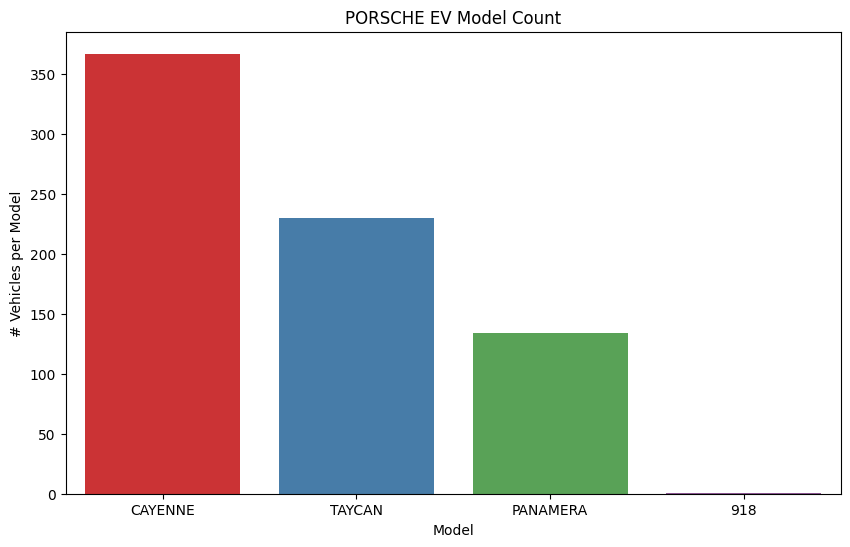

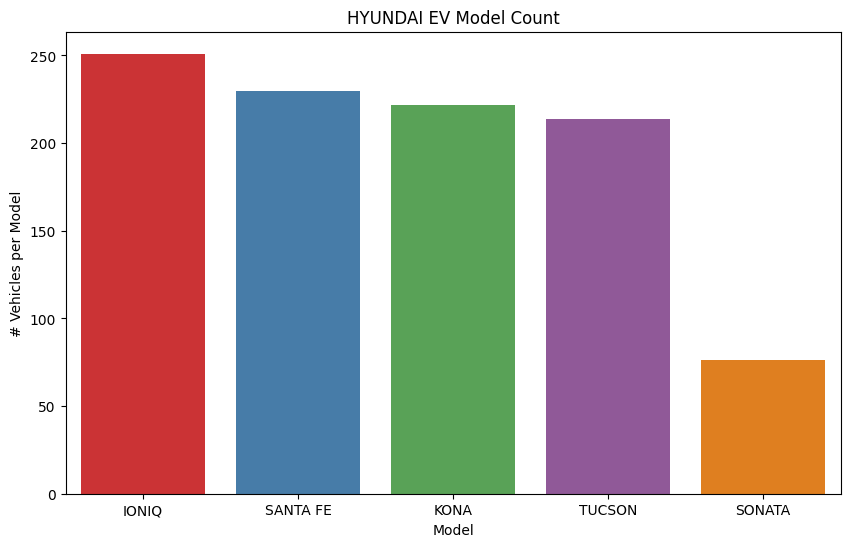

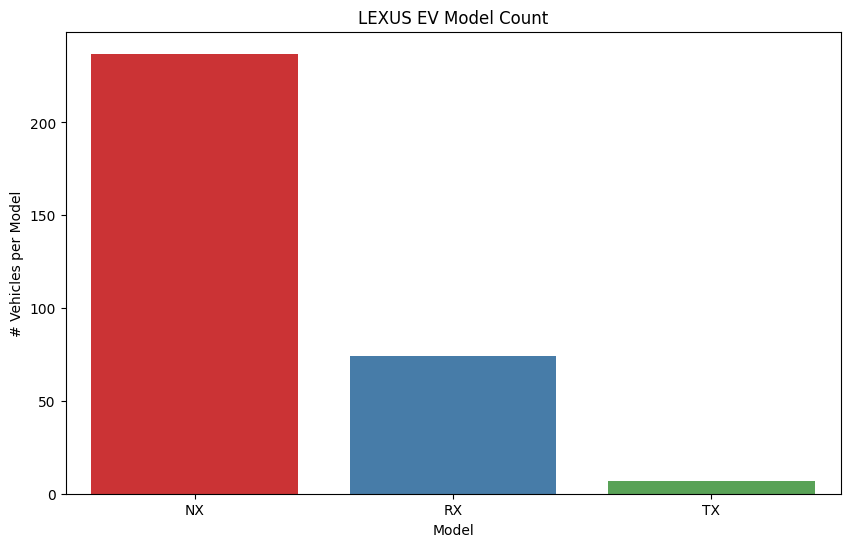

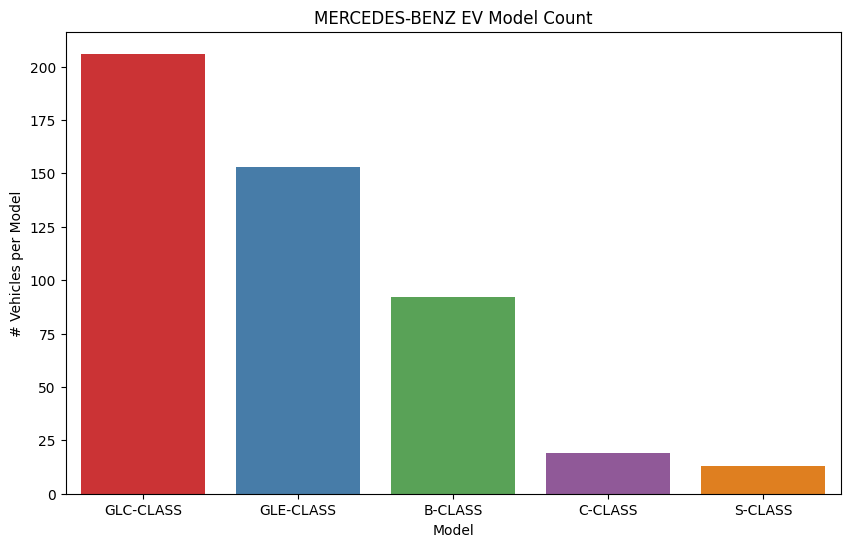

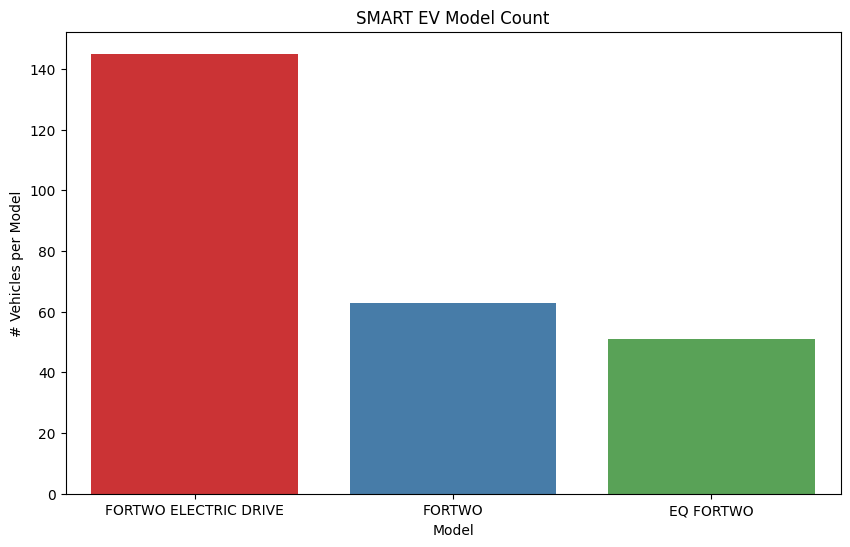

In [57]:
for make in top_5_ev_comp:
    
    df = filtered_data[filtered_data['Make'].isin([make])]
    plt.figure(figsize=(10, 6))
    plt.title(f'{make} EV Model Count')
    sns.barplot(data=df, x='Model', y='count', palette='Set1')
    plt.ylabel('# Vehicles per Model')
    plt.show()